<a href="https://colab.research.google.com/github/One-Mountain/Machine-Learning/blob/main/Copy_of_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH)

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator( rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir, target_size = (IMG_HEIGHT, IMG_WIDTH), batch_size = batch_size, class_mode = "binary"  )
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size= batch_size, class_mode ='binary')
test_data_gen = test_image_generator.flow_from_directory(test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size = 1, classes = ['test'], class_mode = 'binary',  shuffle = False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


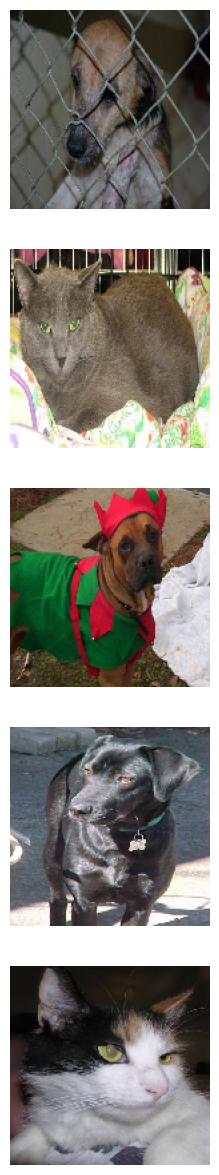

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    vertical_flip= True,
    shear_range = 0.2,
    rotation_range = 0.30,
    width_shift_range= 0.3,
    height_shift_range= 0.3,
    zoom_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255)


Found 2000 images belonging to 2 classes.


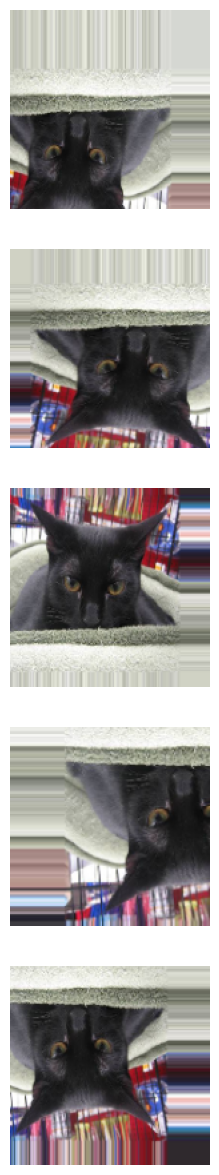

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
from keras.api._v2.keras.layers import BatchNormalization
# 7
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2), padding = "same"))
model.add(Dropout(0.3))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = "relu"))
model.add(BatchNormalization())

model.add(tf.keras.layers.Dense(256, activation = "relu"))
model.add(BatchNormalization())

model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(BatchNormalization())

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = tf.keras.losses.binary_crossentropy,
              metrics = ["accuracy"])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_41 (Ba  (None, 148, 148, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 175232)            0         
                                                                 
 dense_20 (Dense)            (None, 512)              

In [ ]:
# 8
history = model.fit(x = train_data_gen, steps_per_epoch= total_train//batch_size, epochs = epochs, batch_size = batch_size, validation_data = val_data_gen, validation_steps = total_val//batch_size)


Epoch 1/15
15/15 [==============================] - 153s 10s/step - loss: 0.7630 - accuracy: 0.5507 - val_loss: 0.6920 - val_accuracy: 0.5112
Epoch 2/15
15/15 [==============================] - 153s 10s/step - loss: 0.7106 - accuracy: 0.5828 - val_loss: 0.6926 - val_accuracy: 0.5279
Epoch 3/15
15/15 [==============================] - 153s 10s/step - loss: 0.6636 - accuracy: 0.6234 - val_loss: 0.6906 - val_accuracy: 0.5134
Epoch 4/15
15/15 [==============================] - 155s 11s/step - loss: 0.6744 - accuracy: 0.5978 - val_loss: 0.6843 - val_accuracy: 0.5502
Epoch 5/15
15/15 [==============================] - 154s 10s/step - loss: 0.6561 - accuracy: 0.6170 - val_loss: 0.6777 - val_accuracy: 0.5636
Epoch 6/15
15/15 [==============================] - 153s 10s/step - loss: 0.6536 - accuracy: 0.6154 - val_loss: 0.6795 - val_accuracy: 0.5424
Epoch 7/15
15/15 [==============================] - 153s 10s/step - loss: 0.6481 - accuracy: 0.6154 - val_loss: 0.6789 - val_accuracy: 0.5346
Epoch 

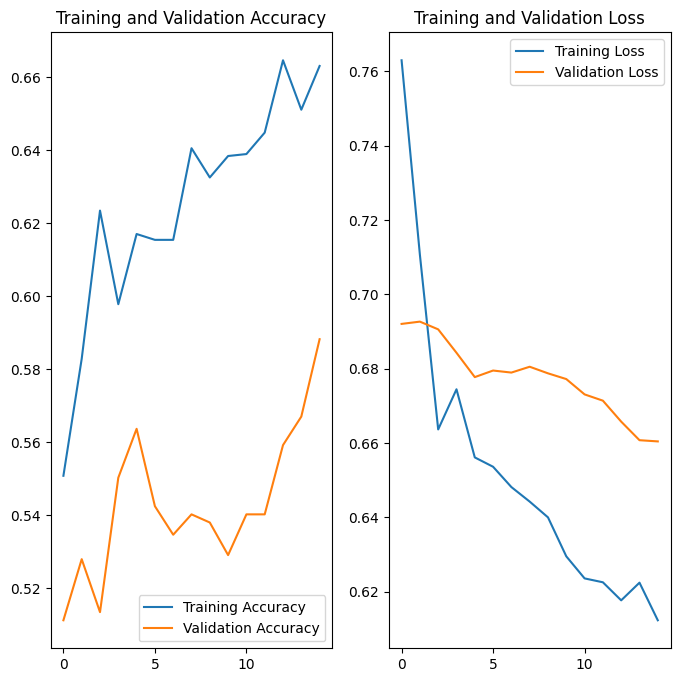

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

50/50 [==============================] - 4s 80ms/step


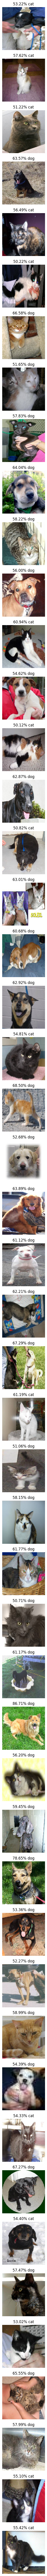

In [ ]:
#10
probabilities = model.predict(test_data_gen)



plotImages([test_data_gen[i][0][0] for i in range(50)], probabilities = probabilities)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
